    1.对类别特征做label encode 
    2.仅使用label encode后的类别特征做naive bayes（3个）
    3.使用naive bayes模型预测每个分类的概率作为新的特征
    4.将3中新产生的特征并上原有的数字特征，输入到全连接模型中，进行训练
    
    有待考虑方向：
    1.平衡数据集
    2.基于机器学习的网络入侵检测研究 徐温雅
    3.特征选择
    

In [279]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Get train dataset

In [280]:
import pandas as pd

train_dataset=pd.read_csv('./KDDTrain+_20Percent.txt',sep=',',header=None)
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## Set column names

In [281]:
columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
        'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
        'root_shell','su_attempted','num_root','num_file_creations','num_shells',
        'num_access_files','num_outbound_cmds','is_hot_login','is_guest_login','count',
        'srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
        'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
        'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
        'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
        'dst_host_rerror_rate','dst_host_srv_rerror_rate','labels','difficulty_level']
len(columns)


43

特征集合

In [282]:
features=columns.copy()
features.remove('labels')
features.remove('difficulty_level')
features

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_hot_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [283]:
len(columns)

43

离散特征集合

In [284]:
discrete_features=[features[i] for i in [1,2,3,6,11,13,14,20,21]]
discrete_features

['protocol_type',
 'service',
 'flag',
 'land',
 'logged_in',
 'root_shell',
 'su_attempted',
 'is_hot_login',
 'is_guest_login']

连续特征集合

In [285]:
continuous_features=[f for f in features if f not in discrete_features]
continuous_features

['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

类别特征集合

In [286]:
categorical_features=[features[i] for i in [1,2,3]]
categorical_features

['protocol_type', 'service', 'flag']

数字型特征

In [287]:
numerical_features=[f for f in features if f not in categorical_features]
numerical_features

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_hot_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [288]:
len(numerical_features)

38

## Dataset Overview

In [289]:
train_dataset.columns=columns
train_dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [290]:
train_dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,19.487695
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,2.328541
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [291]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 43 columns):
duration                       25192 non-null int64
protocol_type                  25192 non-null object
service                        25192 non-null object
flag                           25192 non-null object
src_bytes                      25192 non-null int64
dst_bytes                      25192 non-null int64
land                           25192 non-null int64
wrong_fragment                 25192 non-null int64
urgent                         25192 non-null int64
hot                            25192 non-null int64
num_failed_logins              25192 non-null int64
logged_in                      25192 non-null int64
num_compromised                25192 non-null int64
root_shell                     25192 non-null int64
su_attempted                   25192 non-null int64
num_root                       25192 non-null int64
num_file_creations             25192 non-null int64
num_

## missing value

### no missing value

In [292]:
train_dataset.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_hot_login                   0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

## labels 分布

In [293]:
train_dataset['labels'].value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
multihop               2
phf                    2
loadmodule             1
land                   1
ftp_write              1
spy                    1
Name: labels, dtype: int64

查看各连续特征分布

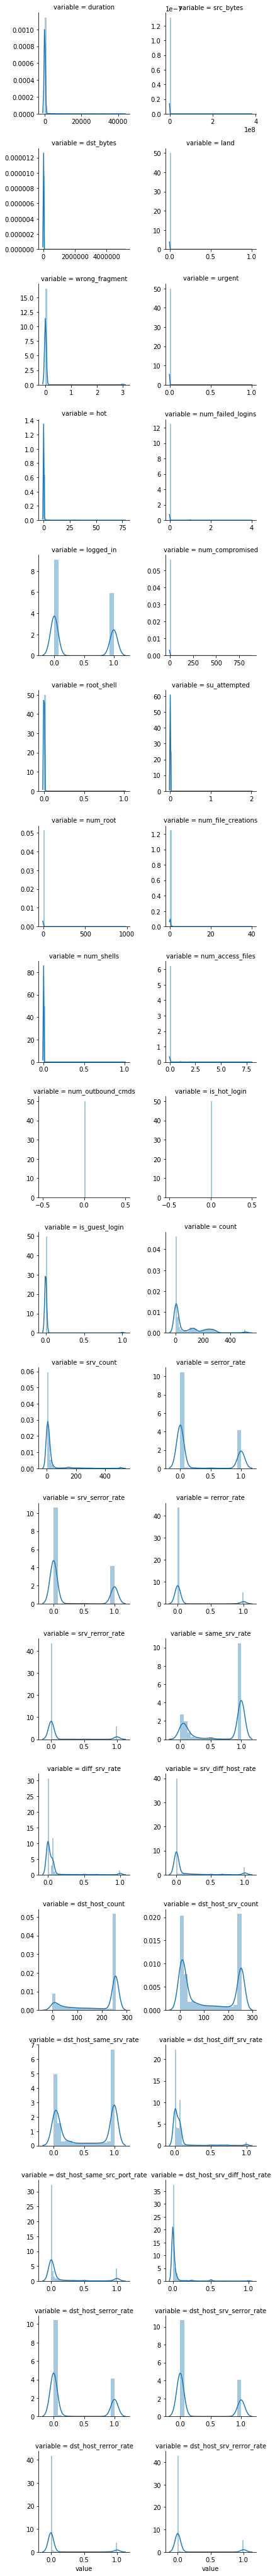

In [294]:
f = pd.melt(train_dataset, value_vars=numerical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

似乎都不是高斯分布，因此采用min-max归一化

查看数字特征之间相关性

In [295]:
conti_corr=train_dataset[numerical_features].corr()

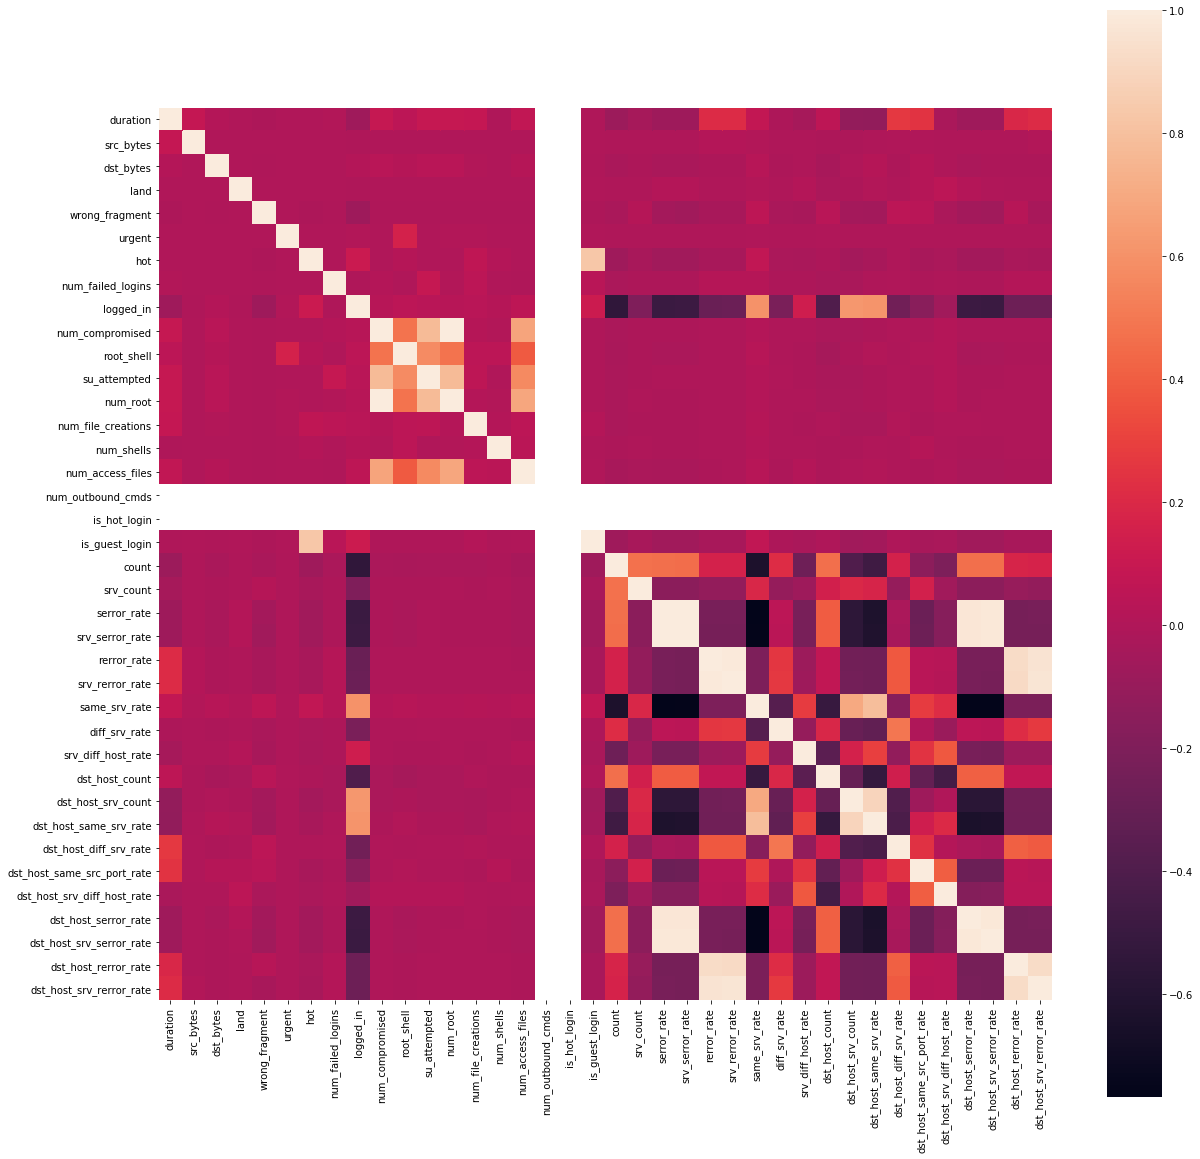

In [296]:
plt.figure(figsize=(20,20))
sns.heatmap(conti_corr,square=True)

labels分类

In [297]:
DOS_class=['back','land','neptune','pod','smurf','teardrop',
           'apache2','mailbomb','processtable','udpstorm']
Probing_class=['ipsweep','nmap','portsweep','satan',
              'mscan','saint']
R2L_class=['ftp_write','guess_passwd','imap','multihop','phf','spy','warezclient','warezmaster',
          'named','sendmail','snmpgetattack','snmpguess','worm','xlock','xsnoop']
U2R_class=['buffer_overflow','loadmodule','perl','rootkit',
          'httptunnel','ps','sqlattack','xterm']

In [298]:
def classi_labels(x):
    if x =='normal':
        return 0;
    elif x in DOS_class:
        return 1;
    elif x in Probing_class:
        return 2;
    elif x in R2L_class:
        return 3;
    elif x in U2R_class:
        return 4;

In [299]:
train_dataset['labels_class']=pd.DataFrame(train_dataset['labels']).applymap(classi_labels)

In [300]:
len(features)

41

离散特征进行onehot编码

In [301]:
train_onehot=pd.get_dummies(train_dataset,columns=categorical_features)
onehot_features=list(train_onehot.columns)
onehot_features

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_hot_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'labels',
 'difficulty_level',
 'labels_class',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_dayt

In [302]:
onehot_features.remove('labels')
onehot_features.remove('labels_class')
onehot_features.remove('difficulty_level')


In [303]:
len(onehot_features)

118

In [304]:
onehot_features

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_hot_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'se

In [337]:
onehot_categorical_features=onehot_features.copy()
for f in continuous_features:
    onehot_categorical_features.remove(f)

In [338]:
onehot_categorical_features

['land',
 'logged_in',
 'root_shell',
 'su_attempted',
 'is_hot_login',
 'is_guest_login',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'service_hostnames',
 'service_http',
 'service_http_443',
 'service_http_8001',
 'service_imap4',
 'service_iso_tsap',
 'service_klogin',
 'service_kshell',
 'service_ldap',
 'service_link',
 'service_login',
 'service_mtp',
 'service_name',
 'service_netbios_dgm',
 'service_netbios_ns',
 'service_netbios_ssn',
 'service_netstat',
 'service_nnsp',
 'service_nntp',
 'service_ntp_u',
 'service_other',
 'service_pm_dump',
 'service_pop_2',
 'service_pop_3',

label 编码

In [305]:
train_label=train_dataset.copy()

In [306]:
from sklearn.preprocessing import LabelEncoder
le=[LabelEncoder() for _ in range(len(categorical_features))]
for i in range(len(categorical_features)):
    f=categorical_features[i]
    le[i]=le[i].fit(train_dataset[f])
    train_label[f]=le[i].transform(train_dataset[f])


In [307]:
train_label

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,difficulty_level,labels_class
0,0,1,19,9,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,2,41,9,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,1,46,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,1,22,9,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,1,22,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0
5,0,1,46,1,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1
6,0,1,46,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,1
7,0,1,46,5,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,1
8,0,1,48,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,1
9,0,1,46,5,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,1


利用discrete features 进行 naive bayes预测

In [339]:
NB_X=train_onehot[onehot_categorical_features]
NB_y=train_label['labels_class']

In [340]:
NB_X

,land,logged_in,root_shell,su_attempted,is_hot_login,is_guest_login,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [341]:
from sklearn.naive_bayes import CategoricalNB
NBmodel=CategoricalNB().fit(NB_X,NB_y)

In [342]:
# 预测
y_predict_nb=NBmodel.predict(NB_X)

In [343]:
# 预测每个分类概率
y_predict_prob=NBmodel.predict_proba(NB_X)
y_predict_prob

array([[8.94276233e-01, 2.85080985e-02, 6.62168211e-03, 7.05919128e-02,
        2.07326716e-06],
       [4.92819224e-01, 1.91917919e-05, 5.07160886e-01, 1.77197747e-07,
        5.20554467e-07],
       [4.33422372e-06, 9.99420542e-01, 5.75118629e-04, 4.86579652e-09,
        1.85322502e-10],
       ...,
       [4.58289352e-04, 7.66495560e-01, 2.33046069e-01, 7.81362795e-08,
        2.97595898e-09],
       [8.46323820e-07, 9.99970118e-01, 2.88359292e-05, 1.92878051e-07,
        7.34610313e-09],
       [5.09625018e-05, 9.99868390e-01, 8.05462542e-05, 9.75709585e-08,
        3.71616325e-09]])

In [344]:
# 新增下列特征
cnb_prob_columns=['cnb_prob0','cnb_prob1','cnb_prob2','cnb_prob3','cnb_prob4']
df_prob=pd.DataFrame(columns=cnb_prob_columns,data=y_predict_prob)

In [345]:
train_dataset[prob_columns]=df_prob

In [346]:
train_dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,difficulty_level,labels_class,prob0,prob1,prob2,prob3,prob4
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.05,0.00,normal,20,0,8.942762e-01,2.850810e-02,6.621682e-03,7.059191e-02,2.073267e-06
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.00,normal,15,0,4.928192e-01,1.919179e-05,5.071609e-01,1.771977e-07,5.205545e-07
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,neptune,19,1,4.334224e-06,9.994205e-01,5.751186e-04,4.865797e-09,1.853225e-10
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.01,normal,21,0,9.998188e-01,3.171765e-05,3.774895e-07,1.490005e-04,6.143594e-08
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,normal,21,0,9.998188e-01,3.171765e-05,3.774895e-07,1.490005e-04,6.143594e-08
5,0,tcp,private,REJ,0,0,0,0,0,0,...,1.00,1.00,neptune,21,1,4.582894e-04,7.664956e-01,2.330461e-01,7.813628e-08,2.975959e-09
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,neptune,21,1,4.334224e-06,9.994205e-01,5.751186e-04,4.865797e-09,1.853225e-10
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,neptune,21,1,4.334224e-06,9.994205e-01,5.751186e-04,4.865797e-09,1.853225e-10
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.00,0.00,neptune,21,1,7.519824e-06,9.993493e-01,6.413789e-04,1.713776e-06,6.527218e-08
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,neptune,21,1,4.334224e-06,9.994205e-01,5.751186e-04,4.865797e-09,1.853225e-10


训练集上naive bayes结果

In [347]:
from sklearn.metrics import classification_report
print(classification_report(y_true=train_label['labels_class'],y_pred=y_predict_nb))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     13449
           1       0.89      0.90      0.89      9234
           2       0.54      0.80      0.64      2289
           3       0.26      0.29      0.27       209
           4       0.00      0.00      0.00        11

    accuracy                           0.87     25192
   macro avg       0.53      0.57      0.55     25192
weighted avg       0.89      0.87      0.88     25192



利用continuous features 进行 naive bayes预测

In [218]:
GauNB_X=train_label[continuous_features]
GauNB_y=train_label['labels_class']

In [219]:
GauNB_X

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0,0,0,0,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
6,0,0,0,0,0,0,0,0,0,0,...,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00
7,0,0,0,0,0,0,0,0,0,0,...,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00
8,0,0,0,0,0,0,0,0,0,0,...,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00
9,0,0,0,0,0,0,0,0,0,0,...,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [220]:
from sklearn.naive_bayes import GaussianNB
GauNBmodel=GaussianNB().fit(GauNB_X,GauNB_y)

In [221]:
# 预测
y_predict_Gau=GauNBmodel.predict(GauNB_X)

In [222]:
# 预测每个分类概率
y_predict_prob_Gau=GauNBmodel.predict_proba(GauNB_X)
y_predict_prob_Gau

array([[9.94429907e-05, 9.98714660e-01, 6.04214482e-06, 5.26046525e-08,
        1.17980219e-03],
       [2.78055824e-05, 9.99705680e-01, 2.21889832e-06, 1.23292610e-08,
        2.64282905e-04],
       [9.85006499e-06, 9.99957059e-01, 1.13368975e-06, 1.77339877e-09,
        3.19550075e-05],
       ...,
       [1.10890474e-05, 9.99937689e-01, 1.21814498e-06, 2.60599720e-09,
        5.00007265e-05],
       [8.44286587e-06, 9.99963565e-01, 1.06872033e-06, 1.45600856e-09,
        2.69218640e-05],
       [3.77882827e-05, 9.99804929e-01, 1.98512945e-06, 9.76627727e-09,
        1.55288088e-04]])

In [223]:
print(classification_report(y_true=train_label['labels_class'],y_pred=y_predict_Gau))

              precision    recall  f1-score   support

           0       0.91      0.16      0.27     13449
           1       0.41      0.98      0.58      9234
           2       0.44      0.09      0.15      2289
           3       0.10      0.03      0.05       209
           4       0.03      0.55      0.06        11

    accuracy                           0.45     25192
   macro avg       0.38      0.36      0.22     25192
weighted avg       0.68      0.45      0.37     25192



结果较差

卡方检验

In [186]:
k=35

In [187]:
from sklearn.feature_selection import SelectKBest,chi2
chi2_select=SelectKBest(chi2,k=k).fit(train_dataset[numerical_features],train_dataset['labels_class'])

In [188]:
chi2_select.pvalues_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.64145508e-03,
       0.00000000e+00, 9.92759638e-54, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.29510552e-24,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.92735383e-93,
                  nan, 9.28737836e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

利用卡方检验选取特征

对数字特征做归一化 min-max

In [391]:
from sklearn.preprocessing import MinMaxScaler
train_onehot[onehot_features]


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [318]:
minmax_scaler=MinMaxScaler()
minmax_scaler.fit(train_numerical)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [319]:
X_train_scaled=minmax_scaler.transform(train_numerical)

In [320]:
X_train_scaled.shape

(25192, 38)

In [321]:
X_train_selected=chi2_select.transform(X_train_scaled)

NameError: name 'chi2_select' is not defined

In [322]:
import numpy as np
X_train=np.column_stack((X_train_scaled,y_predict_prob))

In [323]:
X_train.shape

(25192, 43)

In [324]:
train_y_labels=train_dataset['labels_class']

逻辑回归

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
import math
cs_list=[math.pow(10,i) for i in range(0,5)]
lg_conti=LogisticRegressionCV(cv=5,Cs=cs_list,penalty='l2',scoring='accuracy',
                              solver='sag',tol=0.0001,max_iter=10000,multi_class='auto',
                             refit=True,verbose=1,n_jobs=2).fit(X_train,train_y_labels)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 27 epochs took 5 seconds
convergence after 27 epochs took 5 seconds
convergence after 111 epochs took 18 seconds
convergence after 128 epochs took 21 seconds
convergence after 538 epochs took 88 seconds
convergence after 592 epochs took 96 seconds


In [ ]:
lg_conti.scores_

In [ ]:
lg_conti.C_

In [ ]:
train_y_predict=lg_conti.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=train_y_labels, y_pred=train_y_predict))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(train_y_labels,train_y_predict)

## Get Test dataset

In [368]:
import pandas as pd

test_dataset=pd.read_csv('./KDDTest+.txt',sep=',',header=None)
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [369]:
test_dataset.columns=columns

In [370]:
test_dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


In [371]:
test_dataset.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_hot_login                   0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

labels 分类

In [372]:
test_dataset['labels_class']=pd.DataFrame(test_dataset['labels']).applymap(classi_labels)

In [373]:
test_dataset['labels_class']

0        1
1        1
2        0
3        2
4        2
5        0
6        0
7        3
8        0
9        3
10       2
11       0
12       1
13       1
14       0
15       0
16       0
17       0
18       0
19       1
20       1
21       2
22       0
23       0
24       1
25       1
26       0
27       0
28       1
29       0
        ..
22514    0
22515    1
22516    0
22517    1
22518    0
22519    1
22520    2
22521    2
22522    1
22523    0
22524    4
22525    1
22526    0
22527    0
22528    1
22529    0
22530    1
22531    1
22532    0
22533    0
22534    1
22535    0
22536    1
22537    1
22538    1
22539    0
22540    0
22541    1
22542    0
22543    2
Name: labels_class, Length: 22544, dtype: int64

In [374]:
test_dataset.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_hot_login                   0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

对categorical features 做 label 编码

In [332]:
test_label=test_dataset.copy()

In [333]:
for i in range(len(categorical_features)):
    f=categorical_features[i]
    test_label[f]=le[i].transform(test_dataset[f])

ValueError: y contains previously unseen labels: 'tftp_u'

In [84]:
test_label

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,difficulty_level,labels_class
0,0,1,49,1,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1
1,0,1,49,1,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1
2,2,1,20,9,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21,0
3,0,0,14,9,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15,2
4,1,1,60,2,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11,2
5,0,1,24,9,267,14515,0,0,0,0,...,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21,0
6,0,1,54,9,1022,387,0,0,0,0,...,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21,0
7,0,1,60,9,129,174,0,0,0,0,...,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15,3
8,0,1,24,9,327,467,0,0,0,0,...,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21,0
9,0,1,19,9,26,157,0,0,0,0,...,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7,3


对discrete 特征做bayes

In [386]:
NBmodel.fit(train_onehot[onehot_categorical_features],train_onehot['labels_class'])

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [387]:
NB_X_test=test_onehot[onehot_categorical_features]
NB_y_test=test_onehot['labels_class']

In [388]:
test_onehot[onehot_categorical_features]

,land,logged_in,root_shell,su_attempted,is_hot_login,is_guest_login,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [389]:
y_predict_nb_test=NBmodel.predict(NB_X_test)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [87]:
y_predict_prob_test=NBmodel.predict_proba(NB_X_test)
y_predict_prob_test

array([[3.74429822e-03, 7.44848101e-01, 2.51407425e-01, 2.30355828e-08,
        1.52836967e-07],
       [3.74429822e-03, 7.44848101e-01, 2.51407425e-01, 2.30355828e-08,
        1.52836967e-07],
       [8.73928008e-01, 8.95072905e-02, 1.08489242e-02, 2.55137000e-02,
        2.02077576e-04],
       ...,
       [9.99639261e-01, 2.16927039e-04, 2.86424011e-06, 1.34579466e-04,
        6.36858835e-06],
       [9.98381113e-01, 4.25412331e-06, 1.61113900e-03, 1.15038587e-07,
        3.37869949e-06],
       [2.12491639e-04, 9.62576092e-01, 3.72016055e-02, 1.28506216e-06,
        8.52615737e-06]])

In [88]:
df_prob_test=pd.DataFrame(columns=prob_columns,data=y_predict_prob_test)
test_dataset[prob_columns]=df_prob_test

In [89]:
test_dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,difficulty_level,labels_class,prob0,prob1,prob2,prob3,prob4
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1.00,1.00,neptune,21,1,0.003744,0.744848,0.251407,2.303558e-08,1.528370e-07
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1.00,1.00,neptune,21,1,0.003744,0.744848,0.251407,2.303558e-08,1.528370e-07
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.00,0.00,normal,21,0,0.873928,0.089507,0.010849,2.551370e-02,2.020776e-04
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,0.00,saint,15,2,0.003529,0.000008,0.996462,7.002961e-08,5.141949e-07
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.83,0.71,mscan,11,2,0.021080,0.969861,0.003634,4.635612e-03,7.897842e-04
5,0,tcp,http,SF,267,14515,0,0,0,0,...,0.00,0.00,normal,21,0,0.999639,0.000217,0.000003,1.345795e-04,6.368588e-06
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.72,0.04,normal,21,0,0.999672,0.000126,0.000022,1.456875e-04,3.447122e-05
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,0.02,0.02,guess_passwd,15,3,0.600180,0.362215,0.026454,9.121677e-03,2.028951e-03
8,0,tcp,http,SF,327,467,0,0,0,0,...,0.00,0.00,normal,21,0,0.999639,0.000217,0.000003,1.345795e-04,6.368588e-06
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.00,0.00,guess_passwd,7,3,0.258659,0.000096,0.000144,7.409574e-01,1.432454e-04


In [256]:
print(classification_report(y_true=test_label['labels_class'],y_pred=y_predict_nb_test))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78      9711
           1       0.83      0.74      0.79      7458
           2       0.40      0.42      0.41      2421
           3       0.92      0.22      0.35      2754
           4       0.67      0.14      0.24       200

    accuracy                           0.70     22544
   macro avg       0.70      0.49      0.51     22544
weighted avg       0.73      0.70      0.68     22544



In [91]:
test_numerical=test_dataset[numerical_features]
test_numerical

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00
1,0,0,0,0,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00
2,2,12983,0,0,0,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00
3,0,20,0,0,0,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00
4,1,0,15,0,0,0,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71
5,0,267,14515,0,0,0,0,0,1,0,...,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00
6,0,1022,387,0,0,0,0,0,1,0,...,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04
7,0,129,174,0,0,0,0,1,0,0,...,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02
8,0,327,467,0,0,0,0,0,1,0,...,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00
9,0,26,157,0,0,0,0,1,0,0,...,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00


In [92]:
X_test_scaled=minmax_scaler.transform(test_numerical)
X_test_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [4.66113545e-05, 9.40821721e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.95227734e-05, 6.34686817e-06, ...,
        0.00000000e+00, 7.00000000e-02, 7.00000000e-02],
       [0.00000000e+00, 3.04355791e-08, 3.20626008e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.40000000e-01, 1.00000000e+00]])

In [193]:
X_test_selected=chi2_select.transform(X_test_scaled)

In [194]:
X_test_selected.shape

(22544, 35)

In [93]:
import numpy as np
X_test=np.column_stack((X_test_scaled,y_predict_prob_test))
X_test.shape

(22544, 43)

In [94]:
test_y_labels=test_dataset['labels_class']

In [68]:
test_y_predict=lg_conti.predict(X_test)

NameError: name 'lg_conti' is not defined

In [ ]:
print(classification_report(y_true=test_y_labels, y_pred=test_y_predict))

In [ ]:
accuracy_score(test_y_labels,test_y_predict)

全连接网络训练

In [95]:
import torchvision , torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,TensorDataset


In [232]:
X_train_tensor=torch.from_numpy(X_train)
X_train_tensor.size()

torch.Size([25192, 43])

In [233]:
train_y_tensor=torch.from_numpy(np.array(train_y_labels))
train_y_tensor.shape

torch.Size([25192])

In [234]:
train_tensor=TensorDataset(X_train_tensor,train_y_tensor)

In [235]:
batch_size=50
train_loader=DataLoader(dataset=train_tensor,batch_size=batch_size,
                        shuffle=True,num_workers=2)

In [236]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [237]:
class linear(nn.Module):
    def __init__(self,in_features,fc1_dim,fc2_dim):
        super(linear,self).__init__()
        self.fc1=nn.Linear(in_features,fc1_dim)
        self.fc2=nn.Linear(fc1_dim,fc2_dim)
    def forward(self,x):
        fc1_out=F.relu(self.fc1(x))
        out=self.fc2(fc1_out)
        return F.log_softmax(out)


In [238]:
in_features=X_train_tensor.size()[1]
fc1_dim=128
fc2_dim=5
fc_model=linear(in_features,fc1_dim,fc2_dim)
fc_model=fc_model.cuda()
print(fc_model)

linear(
  (fc1): Linear(in_features=43, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
)


In [239]:
loss_func=nn.CrossEntropyLoss()
lr=0.001
weight_decay=0.0001
optimizer=optim.Adam(fc_model.parameters(),lr=lr,weight_decay=weight_decay)

In [240]:
def train(epoch,Loss_list,Accuracy_list):
    print('Epoch {}'.format(epoch))
    # 统计当前epoch总损失
    train_loss=0
    # 当前epoch准确率
    train_acc=0
    fc_model.train()
    
    for step,(batch_x,batch_y) in enumerate(train_loader):
        # 取出每个batch的 X ,y
        batch_x=torch.tensor(batch_x,dtype=torch.float32)

        batch_x=batch_x.cuda()
        batch_y=batch_y.cuda()
        # 前向传播
        out=fc_model(batch_x)
        # 计算损失
        loss=loss_func(out,batch_y.squeeze())
        print(loss)
        train_loss+=loss.item()
        
        # 每个X的预测结果
        pred=torch.max(out,1)[1]
        # 当前batch的正确个数
        train_correct=(pred==batch_y).sum()
        train_acc+=train_correct.item()
        
        if step % 10==0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, (step+1) * len(batch_x), len(train_loader.dataset),100. * (step+1) / len(train_loader), loss.item()))
            Loss_list.append(train_loss/((step+1)*batch_size))
            Accuracy_list.append(train_acc/((step+1)*batch_size))
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(train_acc)
    print('Train Loss: {:.6f}, Acc: {:.6f}'.format(train_loss / (len(train_dataset)), train_acc / (len(train_dataset))))

In [241]:
# 设置epoch为5
epoch=10
Loss_list=[]
Accuracy_list=[]
for i in range(epoch):
    train(i+1,Loss_list,Accuracy_list)

Epoch 1
tensor(1.5915, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 1 [50/25192 (0%)]	Loss: 1.591494
tensor(1.5665, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.5358, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.5128, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.4989, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.4591, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.4526, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.4495, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.4107, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.3770, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.3639, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 1 [550/25192 (2%)]	Loss: 1.363926
tensor(1.3597, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.3148, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2956, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2631, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2434,

tensor(0.3006, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2404, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3261, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2753, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2270, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 1 [7050/25192 (28%)]	Loss: 0.227029
tensor(0.3575, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2126, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3728, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1514, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1825, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1200, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1624, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2017, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0609, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2734, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 1 [7550/25192 (30%)]	Loss: 0.273418
tensor(0.2691, de

tensor(0.0519, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3055, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0667, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 1 [13550/25192 (54%)]	Loss: 0.066710
tensor(0.1525, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2359, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1932, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2155, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1441, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2073, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1468, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1684, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0616, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0405, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 1 [14050/25192 (56%)]	Loss: 0.040462
tensor(0.0933, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0432, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3653, 

tensor(0.1145, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0470, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 1 [20550/25192 (82%)]	Loss: 0.046986
tensor(0.1460, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1188, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0448, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1473, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0383, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0488, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1228, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0969, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2154, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2466, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 1 [21050/25192 (84%)]	Loss: 0.246590
tensor(0.1773, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1703, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0543, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2163, 

tensor(0.0646, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1566, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2056, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0486, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0598, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3680, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 2 [2550/25192 (10%)]	Loss: 0.368027
tensor(0.0771, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0454, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0299, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.4073, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.4071, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1299, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0202, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0701, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1286, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1638, device='cuda:0', grad_fn=<NllLossBackward>)
Train E

tensor(0.0598, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0302, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1552, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0576, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2062, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 2 [9550/25192 (38%)]	Loss: 0.206154
tensor(0.1255, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0471, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1009, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0236, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1878, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0790, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1194, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1330, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0295, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0251, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 2 [10050/25192 (40%)]	Loss: 0.025110
tensor(0.0288, d

tensor(0.0140, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0629, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1644, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0424, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1594, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1234, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2030, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 2 [16050/25192 (64%)]	Loss: 0.202977
tensor(0.0378, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0310, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1202, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0784, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0740, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0408, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0679, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0531, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1128, device='cuda:0', grad_fn=<NllLossBackward>)
tensor

tensor(0.2161, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1686, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0862, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0734, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0858, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1017, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0516, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 2 [22550/25192 (89%)]	Loss: 0.051600
tensor(0.1017, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0511, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0943, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1218, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1123, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0752, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1057, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1159, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0350, device='cuda:0', grad_fn=<NllLossBackward>)
tensor

tensor(0.0701, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 3 [3550/25192 (14%)]	Loss: 0.070068
tensor(0.0128, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0759, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0662, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0210, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1062, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1261, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1692, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0313, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0187, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0844, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 3 [4050/25192 (16%)]	Loss: 0.084445
tensor(0.1034, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0143, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0193, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0377, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0495, de

tensor(0.0827, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2517, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0307, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0834, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0156, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0272, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 3 [10550/25192 (42%)]	Loss: 0.027184
tensor(0.0228, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0651, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0238, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1100, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0161, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0999, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0466, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0320, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0841, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0536, device='cuda:0', grad_fn=<NllLossBackward>)
Train 

tensor(0.0593, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1128, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1027, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0267, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0753, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0608, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 3 [17550/25192 (70%)]	Loss: 0.060804
tensor(0.0884, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0247, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0530, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1910, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1250, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0864, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0287, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1933, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1245, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1037, device='cuda:0', grad_fn=<NllLossBackward>)
Train 

tensor(0.0300, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0469, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1862, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0196, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0325, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 3 [24550/25192 (97%)]	Loss: 0.032485
tensor(0.1439, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0105, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1905, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0673, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0969, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1046, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0259, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0574, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0369, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0458, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 3 [25050/25192 (99%)]	Loss: 0.045840
tensor(0.1061, 

tensor(0.0250, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1054, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1096, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0820, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0322, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1849, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0370, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0807, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0489, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0432, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 4 [6050/25192 (24%)]	Loss: 0.043176
tensor(0.0598, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2060, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0716, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1831, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0532, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0520, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(

tensor(0.1489, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1304, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0721, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0253, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0872, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0391, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0959, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0796, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1565, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0273, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 4 [13050/25192 (52%)]	Loss: 0.027322
tensor(0.0276, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0155, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1027, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0154, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0485, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0544, device='cuda:0', grad_fn=<NllLossBackward>)
tensor

tensor(0.0490, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0483, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0536, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0858, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 4 [19550/25192 (78%)]	Loss: 0.085765
tensor(0.0392, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0303, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0955, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0209, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0358, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0982, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0128, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0640, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0168, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0804, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 4 [20050/25192 (80%)]	Loss: 0.080450
tensor(0.0509, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0305, 

tensor(0.1096, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0980, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0505, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0430, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0889, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0125, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0163, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0567, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0131, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 5 [1550/25192 (6%)]	Loss: 0.013102
tensor(0.0704, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0766, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2299, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0724, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0500, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1285, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0235, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0

tensor(0.0165, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0564, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0269, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 5 [14050/25192 (56%)]	Loss: 0.026856
tensor(0.1094, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0566, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0332, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0111, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0549, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0446, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0957, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1548, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0151, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1227, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 5 [14550/25192 (58%)]	Loss: 0.122734
tensor(0.0350, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0431, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0256, 

tensor(0.0391, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0960, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0122, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0304, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0092, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 5 [20550/25192 (82%)]	Loss: 0.009235
tensor(0.1290, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0316, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0435, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1226, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1483, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1000, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0846, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0645, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0756, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0499, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 5 [21050/25192 (84%)]	Loss: 0.049910
tensor(0.0289, 

tensor(0.0824, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0286, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1969, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0631, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 6 [2550/25192 (10%)]	Loss: 0.063121
tensor(0.0185, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0303, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0434, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0607, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0916, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0584, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0498, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0100, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0353, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0341, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 6 [3050/25192 (12%)]	Loss: 0.034078
tensor(0.0091, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1754, de

tensor(0.0334, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0435, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1041, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 6 [9550/25192 (38%)]	Loss: 0.104084
tensor(0.0459, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0446, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0347, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0188, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1042, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0631, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0158, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0596, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1035, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 6 [10050/25192 (40%)]	Loss: 0.103542
tensor(0.0847, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1071, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2215, d

tensor(0.1573, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0065, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0831, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0153, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0146, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0378, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 6 [16550/25192 (66%)]	Loss: 0.037824
tensor(0.0466, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0633, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0674, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0478, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1415, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1572, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0401, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1116, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0524, device='cuda:0', grad_fn=<NllLossBackward>)
tensor

tensor(0.0995, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0487, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0128, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0341, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0179, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1497, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0156, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0677, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 6 [24050/25192 (95%)]	Loss: 0.067744
tensor(0.0382, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0698, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0249, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0192, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0121, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1543, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0176, device='cuda:0', grad_fn=<NllLossBackward>)
tensor

tensor(0.0697, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0754, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0684, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0501, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0916, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 7 [5550/25192 (22%)]	Loss: 0.091642
tensor(0.0109, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0218, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0499, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0209, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0677, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0464, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0373, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0161, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0139, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1065, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 7 [6050/25192 (24%)]	Loss: 0.106487
tensor(0.0147, de

tensor(0.0581, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0621, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0199, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1074, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0187, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0668, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0198, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 7 [12550/25192 (50%)]	Loss: 0.019842
tensor(0.0145, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0782, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0526, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1173, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0267, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0305, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0335, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0056, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0541, device='cuda:0', grad_fn=<NllLossBackward>)
tensor

tensor(0.1133, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0696, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0474, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0662, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0400, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0796, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0359, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0820, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0819, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 7 [20050/25192 (80%)]	Loss: 0.007209
tensor(0.0167, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0430, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0356, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0806, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0378, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0163, device='cuda:0', grad_fn=<NllLossBackward>)
tensor

tensor(0.0229, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0544, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0410, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0204, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0589, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0323, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0261, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0713, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 8 [1550/25192 (6%)]	Loss: 0.071278
tensor(0.0092, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0108, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0463, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0275, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0403, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0707, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0199, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0182, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0

tensor(0.0804, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0130, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0320, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0953, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1672, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0429, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 8 [8050/25192 (32%)]	Loss: 0.042906
tensor(0.0163, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1033, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0623, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1310, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0641, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0798, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0345, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0556, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1753, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0385, device='cuda:0', grad_fn=<NllLossBackward>)
Train E

tensor(0.0522, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0958, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0169, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0398, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0258, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1121, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0367, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0859, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 8 [14550/25192 (58%)]	Loss: 0.085893
tensor(0.0189, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0124, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0601, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0196, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0809, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0363, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0140, device='cuda:0', grad_fn=<NllLossBackward>)
tensor

tensor(0.1286, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1379, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0487, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0211, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0253, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0122, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 8 [21050/25192 (84%)]	Loss: 0.012163
tensor(0.0965, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0565, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0588, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0417, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0287, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0461, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0394, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0812, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0834, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)
Train 

tensor(0.0724, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0175, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0770, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0759, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0622, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0304, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 9 [2550/25192 (10%)]	Loss: 0.030376
tensor(0.0410, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1013, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0352, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0461, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0131, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0301, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0715, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0464, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0428, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(

tensor(0.0155, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0268, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0953, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0368, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 9 [9050/25192 (36%)]	Loss: 0.036761
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0490, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1105, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0095, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0246, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0113, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0308, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0170, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0153, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 9 [9550/25192 (38%)]	Loss: 0.015292
tensor(0.2733, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1181, de

tensor(0.0850, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0854, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1032, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0187, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0207, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0711, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1179, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0789, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 9 [16050/25192 (64%)]	Loss: 0.078861
tensor(0.0173, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0206, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0367, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0424, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2674, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0076, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1137, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0394, device='cuda:0', grad_fn=<NllLossBackward>)
tensor

tensor(0.0619, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1628, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0078, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0897, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0471, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0558, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1204, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1396, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 9 [23050/25192 (91%)]	Loss: 0.139583
tensor(0.0194, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0902, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0280, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0101, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0245, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1177, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0168, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0196, device='cuda:0', grad_fn=<NllLossBackward>)
tensor

tensor(0.1189, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0346, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 10 [4550/25192 (18%)]	Loss: 0.034574
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0220, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0745, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0157, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0242, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0684, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0533, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0537, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0155, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0102, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 10 [5050/25192 (20%)]	Loss: 0.010152
tensor(0.0129, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0183, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0396, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0642, 

tensor(0.0413, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0232, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0109, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0898, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2025, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0758, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 10 [11550/25192 (46%)]	Loss: 0.075839
tensor(0.0118, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0509, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0595, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0807, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0856, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0215, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1457, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0242, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1489, device='cuda:0', grad_fn=<NllLossBackward>)
tenso

tensor(0.0577, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0076, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1359, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0207, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0982, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 10 [18050/25192 (72%)]	Loss: 0.098187
tensor(0.0803, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0929, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0947, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0258, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0189, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0190, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0221, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0094, device='cuda:0', grad_fn=<NllLossBackward>)
Train

tensor(0.0056, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0219, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0234, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0378, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0223, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0693, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0447, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0256, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1033, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0233, device='cuda:0', grad_fn=<NllLossBackward>)
Train Epoch: 10 [25050/25192 (99%)]	Loss: 0.023303
tensor(0.0362, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0355, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0168, device='cuda:0', grad_fn=<NllLossBackward>)
24773
Train Loss: 0.000953, Acc: 0.983368


In [242]:
len(Loss_list)

510

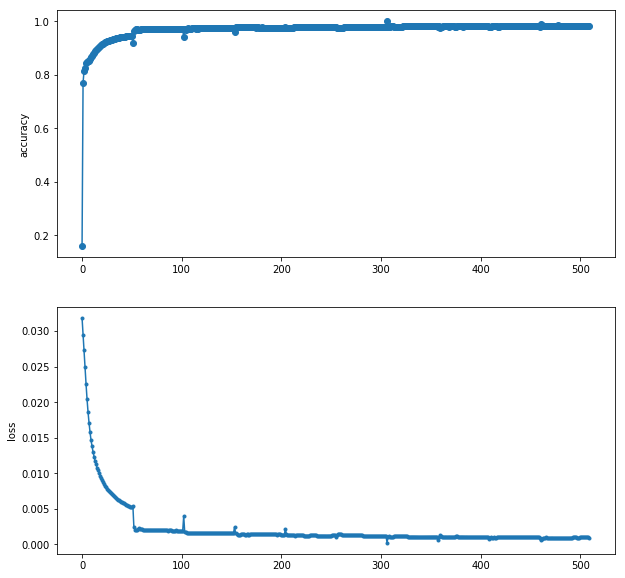

In [243]:
x1 = range(0, len(Accuracy_list))
x2 = range(0, len(Loss_list))
y1 = Accuracy_list
y2 = Loss_list
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')

plt.ylabel('accuracy')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')

plt.ylabel('loss')
plt.show()



In [108]:
X_test_tensor=torch.from_numpy(X_test)
X_test_tensor.size()

torch.Size([22544, 43])

In [109]:
test_y_tensor=torch.from_numpy(np.array(test_y_labels))
test_y_tensor.shape

torch.Size([22544])

In [110]:
test_tensor=TensorDataset(X_test_tensor,test_y_tensor)

In [392]:
test_loader=DataLoader(dataset=test_tensor,batch_size=batch_size,
                        num_workers=2)

In [112]:
def test(y_true,y_pred):
    fc_model.eval()
    # 用于统计总损失
    eval_loss=0
    # 用于统计总accuracy
    eval_acc=0
    
    with torch.no_grad():
        for step,(batch_x,batch_y) in enumerate(test_loader):
            batch_x=torch.tensor(batch_x,dtype=torch.float32)
            batch_x=batch_x.cuda()
            batch_y=batch_y.cuda()
            # 前向传播 得到预测结果
            out=fc_model(batch_x)
            # 计算损失
            loss=loss_func(out,batch_y)
            
            eval_loss+=loss.item()
            # 预测值
            pred=torch.max(out,1)[1]
            y_true+=batch_y.cpu().numpy().tolist()
            y_pred+=pred.cpu().numpy().tolist()
            # 正确数量
            test_correct=(pred==batch_y).sum()
            eval_acc+=test_correct.item()
    print('Test Loss: {:.6f}, Accuracy: {}/{} ({:.2f}%)'.format(eval_loss / (len(test_dataset)),eval_acc, len(test_dataset) ,100.*eval_acc / (len(test_dataset))))

In [244]:
y_true=[]
y_pred=[]
test(y_true,y_pred)

Test Loss: 0.027116, Accuracy: 16601/22544 (73.64%)


In [114]:
print(classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.67      0.97      0.79      9711
           1       0.93      0.80      0.86      7458
           2       0.82      0.65      0.73      2421
           3       0.90      0.01      0.02      2754
           4       0.86      0.03      0.06       200

    accuracy                           0.75     22544
   macro avg       0.84      0.49      0.49     22544
weighted avg       0.80      0.75      0.71     22544



In [245]:
print(classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.65      0.94      0.77      9711
           1       0.90      0.79      0.84      7458
           2       0.84      0.65      0.73      2421
           3       0.50      0.00      0.00      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.74     22544
   macro avg       0.58      0.48      0.47     22544
weighted avg       0.73      0.74      0.69     22544



random forest

In [246]:
from sklearn.ensemble import RandomForestClassifier
import math
n_estimators=10
random_forest_model = RandomForestClassifier(n_estimators=n_estimators,criterion='gini',
                max_features='sqrt', max_depth=None,
                min_samples_split=2, bootstrap=True,verbose=1)

In [247]:
len(train_label[features].columns)

41

In [248]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(random_forest_model,train_label[features],np.array(train_y_labels))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [249]:
scores

array([0.99622941, 0.99662631, 0.99563319, 0.99642715, 0.99702263])

In [250]:
random_forest_model.fit(train_label[features],train_y_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [251]:
rf_predict=random_forest_model.predict(train_label[features])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [252]:
print(classification_report(y_true=train_y_labels, y_pred=rf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13449
           1       1.00      1.00      1.00      9234
           2       1.00      1.00      1.00      2289
           3       1.00      0.99      1.00       209
           4       1.00      0.91      0.95        11

    accuracy                           1.00     25192
   macro avg       1.00      0.98      0.99     25192
weighted avg       1.00      1.00      1.00     25192



In [375]:
test_onehot=pd.get_dummies(test_dataset,columns=categorical_features)


In [376]:
miss_columns = set(train_onehot.columns) - set(test_onehot.columns)

In [377]:
for col in miss_columns:
    test_onehot[col] = 0

In [378]:
adu_columns = set(test_onehot.columns) - set(train_onehot.columns)
#delete adundant columns:
test_onehot.drop(list(adu_columns),axis=1,inplace=True)

In [379]:
test_onehot

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_http_8001,service_urh_i,service_red_i
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,0,1022,387,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7,0,129,174,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,327,467,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9,0,26,157,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [360]:
test_rf_predict=random_forest_model.predict(test_label[features])

ValueError: could not convert string to float: 'private'

In [254]:
print(classification_report(y_true=test_y_labels, y_pred=test_rf_predict))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78      9711
           1       0.97      0.78      0.87      7458
           2       0.85      0.67      0.75      2421
           3       1.00      0.03      0.05      2754
           4       1.00      0.01      0.03       200

    accuracy                           0.75     22544
   macro avg       0.89      0.49      0.50     22544
weighted avg       0.82      0.75      0.71     22544



In [172]:
print(classification_report(y_true=test_y_labels, y_pred=test_rf_predict))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77      9711
           1       0.96      0.78      0.86      7458
           2       0.85      0.62      0.72      2421
           3       1.00      0.02      0.03      2754
           4       0.50      0.01      0.02       200

    accuracy                           0.75     22544
   macro avg       0.79      0.48      0.48     22544
weighted avg       0.81      0.75      0.70     22544



In [255]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y_labels,test_rf_predict)

0.7541696238466998

## Naive Bayes

In [390]:
from sklearn.naive_bayes import CategoricalNB
CNB_model=CategoricalNB().fit(tra)